<a href="https://colab.research.google.com/github/FrenchFreis/CCMACLRL_EXERCISES_COM222ML/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [1205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

In [1206]:
df = pd.read_excel("personality.xlsx")
df.head()

,Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,Lorenzo,0,1,1,16,0
1,Vernon,0,0,0,23,0
2,Xavier,0,1,0,30,0
3,Dawisan,0,1,0,69,0
4,Rainier,0,1,0,71,0


1. Display the summary of all the features of the dataset using `.info()`

In [1207]:
df.drop(columns='Name', inplace=True)
df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Post/Share Frequently?       59 non-null     int64
 1   Active in social media?      59 non-null     int64
 2   Replies to comments?         59 non-null     int64
 3   Number of friends/followers  59 non-null     int64
 4   Personality                  59 non-null     int64
dtypes: int64(5)
memory usage: 2.4 KB


2. Display the total number of samples from each label using `.value_counts()`

In [1208]:
df['Personality'].value_counts()

,count
Personality,
0,35
1,24


## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [1209]:
# Array of features
X = df.drop(columns=['Personality']).values


4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [1210]:
# Array of Labels
y = df['Personality'].values

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [1211]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(41, 4)
(41,)
(18, 4)
(18,)


## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [1212]:
knn = KNeighborsClassifier(n_neighbors=18)

7. Train the model using the `.fit()`

In [1213]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

8. Test the model using the `.predict()`

In [1214]:
y_pred = knn.predict(X_test)

## Evaluate the model

9. Create a confusion matrix

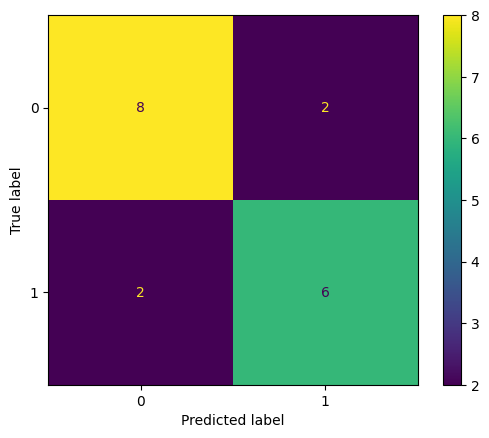

In [1215]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

10. Display the accuracy

In [1216]:
metrics.accuracy_score(y_test, y_pred)

0.7777777777777778

11. Display the precision

In [1217]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.8  0.75]


12. Display the recall

In [1218]:
# Calculate recall
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.8  0.75]


13. Display the f1-score

In [1219]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.8  0.75]


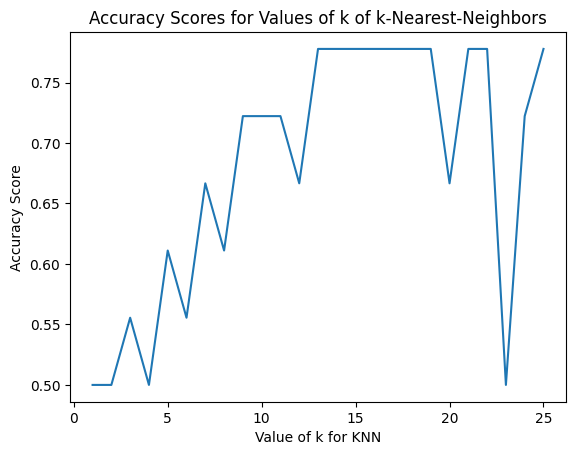

In [1220]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [1221]:
knn.predict([[0, 1, 0, 1000]])

array([0])